In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
cv = CountVectorizer(ngram_range= (2,2))
cv.fit(["The busker hoped that the people passing by would throw money, but they threw tomatoes instead, so he exchanged his hat for a juicer."])
cv.vocabulary_

{'the busker': 15,
 'busker hoped': 0,
 'hoped that': 8,
 'that the': 14,
 'the people': 16,
 'people passing': 12,
 'passing by': 11,
 'by would': 2,
 'would throw': 21,
 'throw money': 19,
 'money but': 10,
 'but they': 1,
 'they threw': 17,
 'threw tomatoes': 18,
 'tomatoes instead': 20,
 'instead so': 9,
 'so he': 13,
 'he exchanged': 6,
 'exchanged his': 3,
 'his hat': 7,
 'hat for': 5,
 'for juicer': 4}

In [3]:
def preproceesing(text):
    doc = nlp(text)
    lemma = []
    for i in doc:
        if not i.is_stop and not i.is_punct:
            lemma.append(i.lemma_)
    return " ".join(lemma)

In [4]:
text = ["The busker hoped that the people passing by would throw money, but they threw tomatoes instead, so he exchanged his hat for a juicer."]
ans = [preproceesing(i) for i in text]
ans

['busker hope people pass throw money throw tomato instead exchange hat juicer']

In [5]:
vector = cv.transform(ans)

In [6]:
vector.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
      dtype=int64)

In [7]:
import pandas as pd

In [8]:
df = pd.read_json("./Datasets/news_dataset.json")

In [9]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [10]:
df.nunique()

text        12689
category        4
dtype: int64

In [11]:
df.category.unique()

array(['SCIENCE', 'BUSINESS', 'CRIME', 'SPORTS'], dtype=object)

In [12]:
df.shape

(12695, 2)

([<matplotlib.patches.Wedge at 0x1f3d78b6c10>,
 [Text(0.5447267143097467, 0.955653078641673, '4254'),
  Text(-1.0999865269668936, 0.005444308157281905, '4167'),
  Text(0.18758656469903184, -1.0838871162369337, '2893'),
  Text(1.036385891993129, -0.3686519807048468, '1381')],
 [Text(0.2971236623507709, 0.5212653156227307, '34%'),
  Text(-0.599992651072851, 0.002969622631244675, '33%'),
  Text(0.10231994438129008, -0.5912111543110546, '23%'),
  Text(0.5653013956326157, -0.20108289856628003, '11%')])

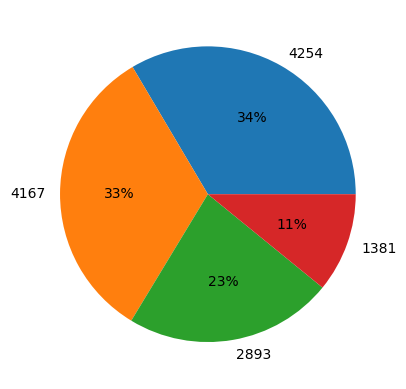

In [13]:
import matplotlib.pyplot as plt
plt.pie(df.category.value_counts() ,labels= [i for i in df.category.value_counts()],autopct='%1.0f%%')

In [14]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [15]:
min = 1381
df[df.category == "BUSINESS"].sample(min ,random_state= 0)
df[df.category == "SPORTS"].sample(min ,random_state= 0)
df[df.category == "CRIME"].sample(min ,random_state= 0)
df[df.category == "SCIENCE"].sample(min ,random_state= 0)

,text,category
5911,"A Day Among the Giants Upon approach, offshore...",SCIENCE
8760,Australia Joins The Hunt For Aliens With A Hug...,SCIENCE
3985,Luis P. Villarreal: We Need a Nonlinear Langu...,SCIENCE
5577,Scientists Say They've Created A Freaky New Fo...,SCIENCE
4120,The SESAME Laboratory: Celebrating the Power o...,SCIENCE
...,...,...
7047,Who Says Funny Women Aren't Sexy? Psychologist...,SCIENCE
7602,From Whale Songs to the Beatles: Computer Anal...,SCIENCE
11097,Great Red Spot Shines Pink In Observatory's Ne...,SCIENCE
5110,Is It The End Of The World As We Know It? It m...,SCIENCE


In [16]:
df_balanced = pd.concat([df[df.category == "BUSINESS"].sample(min ,random_state= 0),
df[df.category == "SPORTS"].sample(min ,random_state= 0),
df[df.category == "CRIME"].sample(min ,random_state= 0),
df[df.category == "SCIENCE"].sample(min ,random_state= 0)])

In [17]:
df_balanced

,text,category
5790,Recycling Opens the Door to a Circular Economy...,BUSINESS
6168,Beyond Silicon Valley: Using a MOOC to Build a...,BUSINESS
2965,Obstacles for Women in Business: The Comfort P...,BUSINESS
9320,Tesla Investigating Second Reported Crash In A...,BUSINESS
3743,The Places That Most Desperately Need A Higher...,BUSINESS
...,...,...
7047,Who Says Funny Women Aren't Sexy? Psychologist...,SCIENCE
7602,From Whale Songs to the Beatles: Computer Anal...,SCIENCE
11097,Great Red Spot Shines Pink In Observatory's Ne...,SCIENCE
5110,Is It The End Of The World As We Know It? It m...,SCIENCE


In [18]:
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df_balanced["category"]= lr.fit_transform(df_balanced.category)

In [20]:
lr.classes_

array(['BUSINESS', 'CRIME', 'SCIENCE', 'SPORTS'], dtype=object)

In [21]:
df_balanced

,text,category
5790,Recycling Opens the Door to a Circular Economy...,0
6168,Beyond Silicon Valley: Using a MOOC to Build a...,0
2965,Obstacles for Women in Business: The Comfort P...,0
9320,Tesla Investigating Second Reported Crash In A...,0
3743,The Places That Most Desperately Need A Higher...,0
...,...,...
7047,Who Says Funny Women Aren't Sexy? Psychologist...,2
7602,From Whale Songs to the Beatles: Computer Anal...,2
11097,Great Red Spot Shines Pink In Observatory's Ne...,2
5110,Is It The End Of The World As We Know It? It m...,2


In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_balanced.text,df_balanced.category,random_state=0,test_size=.2,stratify=df_balanced.category)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline(
    [
        ("CountVectorizer", CountVectorizer()),
        ("MultinomialNB", MultinomialNB())
    ]
)

clf.fit(x_train,y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [24]:
y_pred = clf.predict(x_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       277
           1       0.88      0.89      0.88       276
           2       0.91      0.80      0.86       276
           3       0.90      0.88      0.89       276

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



In [26]:
y_test[:5]

3617    0
4619    3
4543    3
2964    1
3159    0
Name: category, dtype: int32

In [27]:
y_pred[:5]

array([0, 3, 3, 1, 0])

Training With Preprocessing

In [28]:
df_balanced["new_text"] = df_balanced.text.apply(preproceesing)

In [29]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_balanced.new_text,df_balanced.category,random_state=0,test_size=.2,stratify=df_balanced.category)

In [30]:
clf.fit(x_train,y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [31]:
y_pred = clf.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       277
           1       0.86      0.92      0.89       276
           2       0.89      0.83      0.86       276
           3       0.89      0.89      0.89       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105

